In [172]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import KernelPCA, PCA

from factor_analyzer import FactorAnalyzer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn import preprocessing  
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Data Visualization

C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


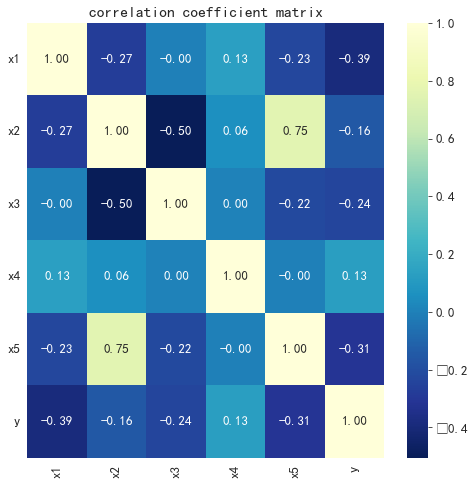

In [173]:
data=pd.read_excel('airfoil_self_noise.xlsx')
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})   # 解决Seaborn中文显示问题
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap="YlGnBu_r",annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title('correlation coefficient matrix')
plt.savefig('correlation coefficient.jpg', dpi=300,bbox_inches='tight')
plt.show()

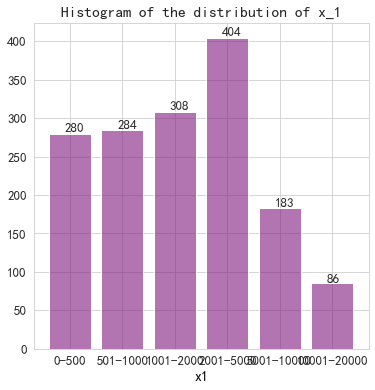

In [174]:
type=['0-500','501-1000','1001-2000','2001-5000','5001-10000','10001-20000']
len_num=[280,284,308,404,183,86]
plt.rcParams['font.size']=13
# Choose the height of the bars
height=len_num
 
# Choose the names of the bars
bars =  type
y_pos = np.arange(len(bars))
 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2-0.1, 1.01*height, '%s' % int(height))
# Create bars
a=plt.bar(y_pos, height,color=(0.5,0.1,0.5,0.6))
autolabel(a)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('x1', fontweight='bold', color = 'black', fontsize='14')
plt.title('Histogram of the distribution of x_1')
# Show graphic
params = {
    'figure.figsize': '10,4'
}
plt.rcParams.update(params)
plt.savefig('.jpg', dpi=300,bbox_inches='tight') 
plt.show()

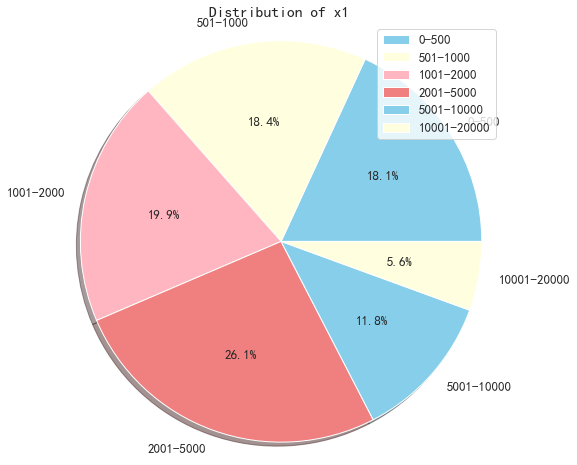

In [175]:

type=['0-500','501-1000','1001-2000','2001-5000','5001-10000','10001-20000']
len_num=[280,284,308,404,183,86]
labels = type
explode = [0,0,0,0,0,0]
fig1, ax1 = plt.subplots(1,1,figsize=(8,8))
ax1.pie(len_num, explode = explode, labels = labels, autopct="%3.1f%%",startangle=0, shadow = True, colors = ['skyblue','lightyellow', 'lightpink','lightcoral'])
ax1.axis('equal')
plt.legend()
plt.title('Distribution of x1')
plt.savefig('.jpg', dpi=300,bbox_inches='tight') 
plt.show()

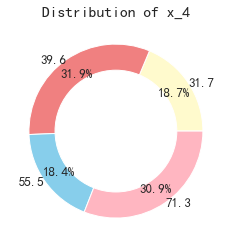

In [176]:
names=['31.7','39.6','55.5','71.3']
size=[281,480,277,465]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
explode = [0,0,0,0]
plt.pie(size, explode=explode,labels=names,autopct="%3.1f%%", labeldistance=1.0, colors=['lemonchiffon','lightcoral','skyblue','lightpink'] ,pctdistance=0.8)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of x_4')
params = {
    'figure.figsize': '6,6'
}
plt.rcParams.update(params) 
plt.savefig('.jpg', dpi=300,bbox_inches='tight')
plt.show()

C:\Users\jingu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jingu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


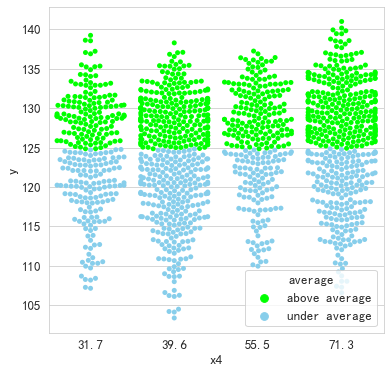

In [177]:
ave = sum(data.y)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.y]
sns.swarmplot(x='x4', y = 'y', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'skyblue'})
plt.savefig('graph.png')

In [178]:
df = pd.read_excel('airfoil_self_noise.xlsx')
df.head()

df.shape   
df.info() 
#df.describe().T
#print(df)
#scaler = StandardScaler()
X_input = df.dropna()
scaler = MinMaxScaler()

X_input = scaler.fit_transform(X_input)
X_input = pd.DataFrame(X_input)

#X_input = pd.concat([X_input,df['quality']],axis=1)
#X_input.columns = df.columns.tolist()
X_input.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness","Scaled sound pressure level"] #添加自定义的columns的名字


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1503 non-null   int64  
 1   x2      1503 non-null   float64
 2   x3      1503 non-null   float64
 3   x4      1503 non-null   float64
 4   x5      1503 non-null   float64
 5   y       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [179]:
#Split data into training and test sets
#X_input = np.array(X_input,type(float))
X = X_input.iloc[:,0:5]
print(X)
y = X_input.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) #split the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

      Frequency  Angle of attack  Chord length  Free-stream velocity  \
0      0.030303         0.000000      1.000000              1.000000   
1      0.040404         0.000000      1.000000              1.000000   
2      0.053030         0.000000      1.000000              1.000000   
3      0.070707         0.000000      1.000000              1.000000   
4      0.090909         0.000000      1.000000              1.000000   
...         ...              ...           ...                   ...   
1498   0.116162         0.702703      0.272727              0.199495   
1499   0.148990         0.702703      0.272727              0.199495   
1500   0.191919         0.702703      0.272727              0.199495   
1501   0.242424         0.702703      0.272727              0.199495   
1502   0.308081         0.702703      0.272727              0.199495   

      Suction side displacement thickness  
0                                0.039005  
1                                0.039005  
2  

((1052, 5), (1052,), (451, 5), (451,))

In [180]:
X["Frequency"].unique()

array([0.03030303, 0.04040404, 0.0530303 , 0.07070707, 0.09090909,
       0.11616162, 0.1489899 , 0.19191919, 0.24242424, 0.30808081,
       0.39393939, 0.49494949, 0.62121212, 0.7979798 , 0.01515152,
       0.02171717, 0.        , 0.00252525, 0.00580808, 0.01010101,
       1.        ])

In [181]:
X["Angle of attack"].unique()

array([0.        , 0.06756757, 0.13513514, 0.18018018, 0.09009009,
       0.23873874, 0.32882883, 0.12162162, 0.24324324, 0.32432432,
       0.44594595, 0.56756757, 0.18918919, 0.37837838, 0.5045045 ,
       0.69369369, 0.88738739, 0.21621622, 0.42792793, 0.57207207,
       0.78378378, 1.        , 0.14864865, 0.3018018 , 0.4009009 ,
       0.55405405, 0.7027027 ])

In [182]:
X["Chord length"].unique()

array([1.        , 0.72727273, 0.45454545, 0.09090909, 0.        ,
       0.27272727])

In [183]:
X["Free-stream velocity"].unique()

array([1.        , 0.6010101 , 0.19949495, 0.        ])

In [184]:
X_input["Suction side displacement thickness"].unique()

array([3.90047215e-02, 4.18910897e-02, 4.65552358e-02, 5.01973277e-02,
       5.11390518e-02, 6.06852352e-02, 6.64807260e-02, 7.10945365e-02,
       7.85498958e-02, 8.43717610e-02, 7.89001765e-02, 9.30119034e-02,
       3.00422243e-02, 3.26264064e-02, 3.67937470e-02, 4.00464274e-02,
       4.36062929e-02, 4.71390944e-02, 5.28361549e-02, 5.72830994e-02,
       6.21497947e-02, 6.69794278e-02, 7.47678296e-02, 8.08472339e-02,
       8.26317348e-02, 9.89923603e-02, 1.73066903e-01, 1.85654254e-01,
       2.05952262e-01, 2.21795913e-01, 2.06534259e-02, 2.28578499e-02,
       2.64121992e-02, 2.91906561e-02, 3.51285346e-02, 4.39119266e-02,
       6.22525345e-02, 6.77841081e-02, 7.67033373e-02, 8.36753368e-02,
       1.22731118e-01, 1.49818573e-01, 3.25792392e-01, 3.52403038e-01,
       3.95308976e-01, 4.28849388e-01, 8.25973238e-01, 1.00000000e+00,
       5.85747940e-03, 6.22727377e-03, 6.74255875e-03, 7.09321869e-03,
       1.77070687e-02, 1.94138252e-02, 8.70161045e-02, 9.07007748e-02,
      

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


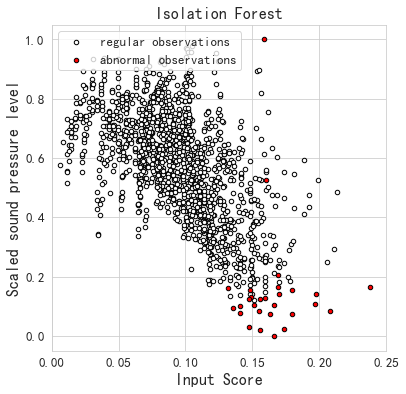

the regular observations:
Frequency                              1475
Angle of attack                        1475
Chord length                           1475
Free-stream velocity                   1475
Suction side displacement thickness    1475
Scaled sound pressure level            1475
dtype: int64
the outliners:
Frequency                              28
Angle of attack                        28
Chord length                           28
Free-stream velocity                   28
Suction side displacement thickness    28
Scaled sound pressure level            28
dtype: int64


In [185]:
clf = IsolationForest(max_samples=256,contamination=0.01)
#训练分类器
#X_input = data[:,0:11]    

clf.fit(X_input)
#计算异常分数
#score = clf.score_samples(X_input)

# 输出decision_function的结果：大于0表示正样本的可信度大于负样本，否则可信度小于负样本。

scores = clf.decision_function(X_input)
#print(scores)

X_inliner= []
X_outliner= []
X_select= []
X_abandon= []
scores_num = 0
X_train_size= df.shape[0]-1
sum1=[]
sum2=[]

while scores_num <= X_train_size:
    if scores[scores_num] >= 0.02:
        X_inliner.append([X_input.iloc[scores_num,0], X_input.iloc[scores_num,5]])
        X_select.append(X_input.iloc[scores_num,:])
        m=0.16*(X_input.iloc[scores_num,0])+0.15*(X_input.iloc[scores_num,1])+0.07*(X_input.iloc[scores_num,2])
        +0.02*(X_input.iloc[scores_num,4])+(X_input.iloc[scores_num,5])
        sum1.append(m)
    else:
            X_outliner.append([X_input.iloc[scores_num,0], X_input.iloc[scores_num,5]])
            X_abandon.append(X_input.iloc[scores_num,:])
            m=0.16*(X_input.iloc[scores_num,0])+0.15*(X_input.iloc[scores_num,1])+0.07*(X_input.iloc[scores_num,2])
            +0.02*(X_input.iloc[scores_num,4])+(X_input.iloc[scores_num,5])
            sum2.append(m)
    scores_num = scores_num + 1



X_inliner = np.array(X_inliner)
X_outliner = np.array(X_outliner)
#print (X_inliner)
#print (X_outliner)
X_select = pd.DataFrame(X_select)
X_abandon = pd.DataFrame(X_abandon)




plt.title("Isolation Forest",size=16)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

a = plt.scatter(sum1, X_inliner[:, 1], c='white',
                 s=20, edgecolor='k')

b = plt.scatter(sum2, X_outliner[:, 1], c='red',s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 0.25))
#plt.ylim((-0.5, 1.5))
plt.legend([a, b],["regular observations", "abnormal observations"],loc="upper left")
#plt.legend([a,b], ["正常数据点", "异常数据点"],loc="upper left")
plt.xlabel("Input Score",size=16)
plt.ylabel("Scaled sound pressure level",size=16)
#X_inliner.iloc[:,1].plt.scatter(figsize=(12,6))
#X_outliner.iloc[:,1].plt.scatter(figsize=(12,6))
plt.show()
print("the regular observations:")
print (X_select.count())
print("the outliners:")
print (X_abandon.count())

# PCA

[0.16 0.15 0.07 0.02]


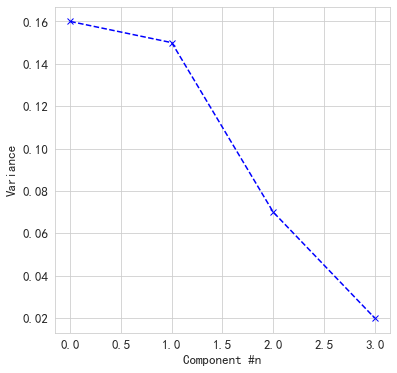

,0,1,2,3
0,-0.08091,0.83324,-0.18936,-0.12347
1,-0.08094,0.83409,-0.18678,-0.11391
2,-0.08098,0.83515,-0.18356,-0.10196
3,-0.08103,0.83664,-0.17904,-0.08523
4,-0.08109,0.83834,-0.17389,-0.06611
...,...,...,...,...
1470,0.19852,-0.61100,-0.53793,0.15301
1471,0.19848,-0.60994,-0.53471,0.16496
1472,0.19843,-0.60845,-0.53019,0.18169
1473,0.19837,-0.60675,-0.52504,0.20081


In [186]:
X = X_select.loc[:,"Frequency":"Suction side displacement thickness"].reset_index(drop=True)
Y = X_select["Scaled sound pressure level"].reset_index(drop=True)

pca = PCA(n_components=X.shape[1]-1)  # Create a principal component analysis object, set the principal component number as the number of sample features - 1

reduced_x = pca.fit_transform(X)  # Create a principal component analysis model based on standardized data to reduce the dimension of the sample

covper = pca.explained_variance_  # The variance value of each principal component after dimensionality reduction
covper = np.round(covper, 2)  # Adjust accuracy
print(covper)

# draw a gravel diagram

plt.plot(covper, 'bx--')
plt.xlabel('Component #n')
plt.ylabel('Variance')
plt.show()

contribution = pca.explained_variance_ratio_  # The proportion of the variance value of each principal component after dimensionality reduction to the total variance value (contribution rate)
contribution = np.round(contribution, 5)
pd.DataFrame(contribution)  # output contribution rate

pd.DataFrame(np.round(reduced_x, 5))   # output principal components

C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


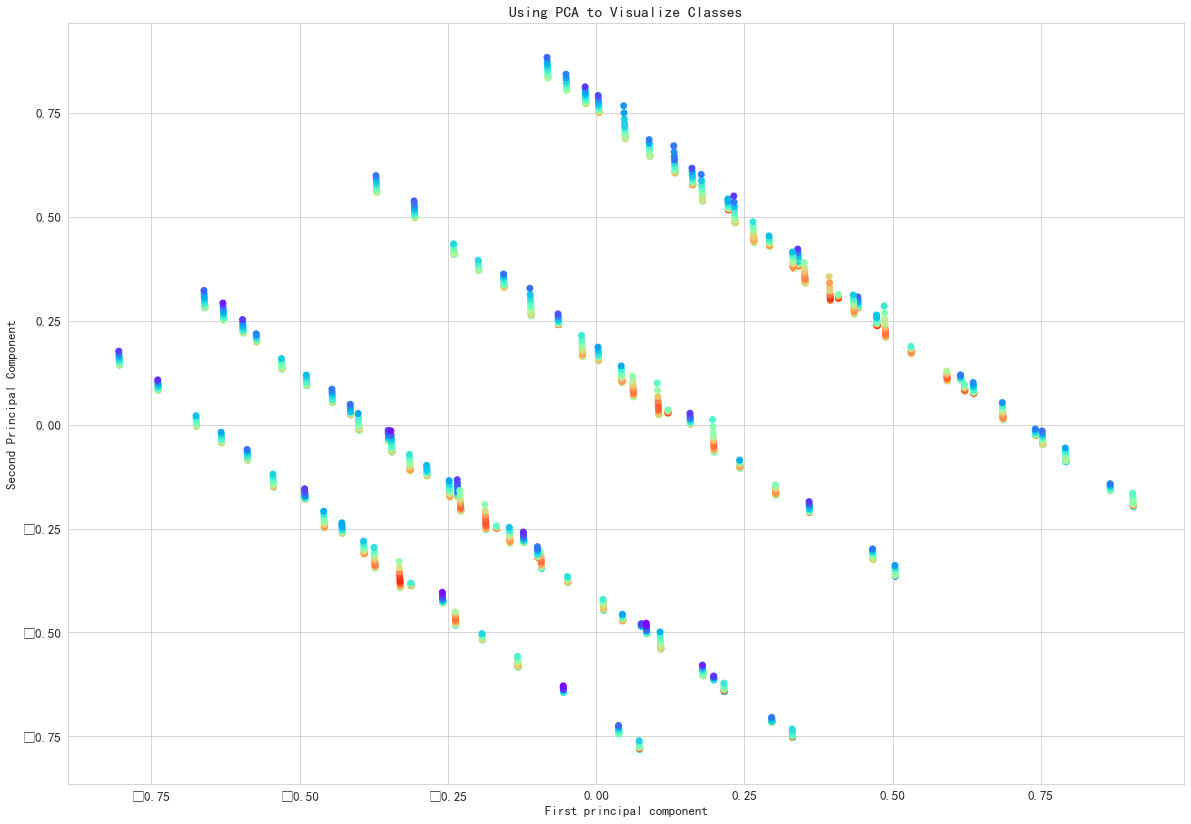

In [187]:
#Preprocessing in preparation for PCA: Standardizing the predictor variables
#X_pca = StandardScaler().fit_transform(X)

#Fit PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape

plt.figure(figsize=(20,14))
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

In [188]:
print("components: ", pca.components_, "\n")
print("explained variance: ", pca.explained_variance_, "\n")
exp_var_rat = pca.explained_variance_ratio_
print("explained variance ratio: ", exp_var_rat)
total = sum(exp_var_rat[0:8])
print("total explained variance ratio: ", total)

components:  [[-0.00298725  0.42261563 -0.48577848  0.72558079  0.24277333]
 [ 0.08422629 -0.39505977  0.55214645  0.68443719 -0.25201935]
 [ 0.25527699 -0.45220531 -0.64432482  0.02077822 -0.5610328 ]] 

explained variance:  [0.15896436 0.15075844 0.06682618] 

explained variance ratio:  [0.39121002 0.37101533 0.16445871]
total explained variance ratio:  0.926684066385141


In [189]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#X.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness"] #添加自定义的columns的名字
#Y.columns = ["Scaled sound pressure level"]
#y.columns = ["Scaled sound pressure level"]
scaler = MinMaxScaler()
#X_pos = scaler.fit_transform(X)
X_pos = pd.DataFrame(X)



#apply SelectKBest class to extract top best features
bestFeatures = SelectKBest(score_func=chi2, k=3)
output=(10*Y).astype(int)
bestFeaturesFit = bestFeatures.fit(X_pos,output)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)  #Store predictor scores in a column 
dfcolumns = pd.DataFrame(X.columns)  #Store predictor variable names in a column

# #concatenate scores with predictor names
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']   #naming the dataframe columns
print(predScores.nlargest(13,'Score'))       #print top (by score) 10 features



                             Predictor      Score
0                            Frequency  48.488698
2                         Chord length  31.895465
4  Suction side displacement thickness  29.495903
3                 Free-stream velocity  14.448813
1                      Angle of attack   9.805650


In [190]:
X_PCA = X_pos.loc[:,["Frequency","Chord length","Suction side displacement thickness"]]

X_PCA

,Frequency,Chord length,Suction side displacement thickness
0,0.030303,1.000000,0.039005
1,0.040404,1.000000,0.039005
2,0.053030,1.000000,0.039005
3,0.070707,1.000000,0.039005
4,0.090909,1.000000,0.039005
...,...,...,...
1470,0.040404,0.272727,0.904111
1471,0.053030,0.272727,0.904111
1472,0.070707,0.272727,0.904111
1473,0.090909,0.272727,0.904111


# Regression

# OLS

In [191]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

datas = X_select
y = datas.iloc[:, -1] 
x = datas.iloc[:, 0:5] 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.473
Model:                                     OLS   Adj. R-squared:                  0.472
Method:                          Least Squares   F-statistic:                     264.0
Date:                         Thu, 20 Apr 2023   Prob (F-statistic):          1.44e-201
Time:                                 21:33:37   Log-Likelihood:                 960.11
No. Observations:                         1475   AIC:                            -1908.
Df Residuals:                             1469   BIC:                            -1876.
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Stepwise

In [192]:
y = X_select.iloc[:, -1] 
X = X_select.iloc[:,0:5]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 

In [193]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['Frequency',
 'Angle of attack',
 'Chord length',
 'Free-stream velocity',
 'Suction side displacement thickness']

# Ridge Regression

In [194]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [195]:
y = X_select.iloc[:, -1] 
X = X_select.iloc[:,0:5]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) #
ridge=Ridge(alpha=0.4)
ridge.fit(X_train,y_train)
print("Training dataset score："+str(r2_score(y_train,ridge.predict(X_train))))
print("Testing dataset score："+str(r2_score(y_test,ridge.predict(x_test))))

Training dataset score：0.46555855607599594
Testing dataset score：0.4881596984067039


# Lasso Regression

In [196]:
from sklearn.linear_model import Lasso

In [197]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# load the data
y = X_select.iloc[:, -1] 
X = X_select.iloc[:,0:5]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# perform Lasso regression with cross-validation
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

# evaluate the model on the test set
train_score=lasso_cv.score(X_train, y_train)
test_score = lasso_cv.score(X_test, y_test)
print("Training dataset score："+str(train_score))
print("Testing dataset score："+str(test_score))

Training dataset score：0.4583325293471773
Testing dataset score：0.5333169436788294


# PCR

In [198]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

datas = X_select
y = datas.iloc[:, -1] 
x = X_pca
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.124
Model:                                     OLS   Adj. R-squared:                  0.122
Method:                          Least Squares   F-statistic:                     69.44
Date:                         Thu, 20 Apr 2023   Prob (F-statistic):           5.32e-42
Time:                                 21:33:37   Log-Likelihood:                 584.92
No. Observations:                         1475   AIC:                            -1162.
Df Residuals:                             1471   BIC:                            -1141.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## View x_3 and x_4 as categorical variables

In [199]:
datas = X_select
dummies=pd.get_dummies(datas['Chord length'],prefix='Chord length')
datas=pd.concat([datas,dummies],axis=1)
dummies=pd.get_dummies(datas['Free-stream velocity'],prefix='Free-stream velocity')
datas=pd.concat([datas,dummies],axis=1)

In [200]:
datas=datas.drop(['Chord length', 'Free-stream velocity'], axis=1)

In [201]:
datas

,Frequency,Angle of attack,Suction side displacement thickness,Scaled sound pressure level,Chord length_0.0,Chord length_0.0909090909090909,Chord length_0.2727272727272727,Chord length_0.45454545454545453,Chord length_0.7272727272727271,Chord length_0.9999999999999999,Free-stream velocity_0.0,Free-stream velocity_0.1994949494949496,Free-stream velocity_0.601010101010101,Free-stream velocity_1.0
0,0.030303,0.000000,0.039005,0.606829,0,0,0,0,0,1,0,0,0,1
1,0.040404,0.000000,0.039005,0.580238,0,0,0,0,0,1,0,0,0,1
2,0.053030,0.000000,0.039005,0.600181,0,0,0,0,0,1,0,0,0,1
3,0.070707,0.000000,0.039005,0.643790,0,0,0,0,0,1,0,0,0,1
4,0.090909,0.000000,0.039005,0.640333,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.040404,0.702703,0.904111,0.421305,0,0,1,0,0,0,0,1,0,0
1495,0.053030,0.702703,0.904111,0.394448,0,0,1,0,0,0,0,1,0,0
1496,0.070707,0.702703,0.904111,0.297126,0,0,1,0,0,0,0,1,0,0
1497,0.090909,0.702703,0.904111,0.199803,0,0,1,0,0,0,0,1,0,0


In [202]:
datas.shape

(1475, 14)

# OLS in new dataset

In [203]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

y = datas.iloc[:, 3] 
x = datas.drop(['Scaled sound pressure level'], axis=1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.479
Model:                                     OLS   Adj. R-squared:                  0.475
Method:                          Least Squares   F-statistic:                     122.1
Date:                         Thu, 20 Apr 2023   Prob (F-statistic):          5.90e-198
Time:                                 21:33:38   Log-Likelihood:                 967.71
No. Observations:                         1475   AIC:                            -1911.
Df Residuals:                             1463   BIC:                            -1848.
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [204]:
y = datas.iloc[:, 3] 
X = datas.drop(['Scaled sound pressure level'], axis=1)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 

# Ridge in new dataset

In [205]:
ridge=Ridge(alpha=0.4)
ridge.fit(X_train,y_train)
print("Training dataset score："+str(r2_score(y_train,ridge.predict(X_train))))
print("Testing dataset score："+str(r2_score(y_test,ridge.predict(x_test))))

Training dataset score：0.47453573730612597
Testing dataset score：0.49892868050383865


# Lasso in new dataset

In [206]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# perform Lasso regression with cross-validation
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

# evaluate the model on the test set
train_score=lasso_cv.score(X_train, y_train)
test_score = lasso_cv.score(X_test, y_test)
print("Training dataset score："+str(train_score))
print("Testing dataset score："+str(test_score))

Training dataset score：0.46690213125665947
Testing dataset score：0.5474026630146699


# Stepwise in new data set 

In [207]:
backward_regression(X_train, y_train)

Drop  with p-value 


C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['Frequency',
 'Angle of attack',
 'Suction side displacement thickness',
 'Chord length_0.0',
 'Chord length_0.0909090909090909',
 'Chord length_0.2727272727272727',
 'Chord length_0.45454545454545453',
 'Chord length_0.9999999999999999',
 'Free-stream velocity_0.0',
 'Free-stream velocity_0.1994949494949496',
 'Free-stream velocity_0.601010101010101',
 'Free-stream velocity_1.0']

In [208]:
x=x.drop(['Chord length_0.7272727272727271'], axis=1)

In [209]:
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.482
Model:                                     OLS   Adj. R-squared:                  0.478
Method:                          Least Squares   F-statistic:                     123.9
Date:                         Thu, 20 Apr 2023   Prob (F-statistic):          3.93e-200
Time:                                 21:33:38   Log-Likelihood:                 972.80
No. Observations:                         1475   AIC:                            -1922.
Df Residuals:                             1463   BIC:                            -1858.
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Machine Learning

In [210]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [211]:
y = X_select.iloc[:, -1] 
X = X_select.iloc[:,0:5]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 
from sklearn.preprocessing import MinMaxScaler
# Training dataset MinMaxSscaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
y_train=y_train.values.reshape(-1,1)
min_max_scaler.fit(y_train)
y_train = min_max_scaler.transform(y_train)
# Testing dataset MinMaxSscaler
min_max_scaler.fit(x_test)
x_test = min_max_scaler.transform(x_test)
y_test=y_test.values.reshape(-1,1)
min_max_scaler.fit(y_test)
y_test = min_max_scaler.transform(y_test)

In [212]:
#Decision Tree
DTR = DecisionTreeRegressor(max_depth=30)
DTR.fit(X_train,y_train)
y_pre_DTR = DTR.predict(x_test)
DTR_score=r2_score(y_test,y_pre_DTR)
print(DTR_score)

0.8081903378644981


In [213]:
#SVR
SUPPOT = SVR()
SUPPOT.fit(X_train,y_train)
y_pre_SVR = SUPPOT.predict(x_test)
SVR_score=r2_score(y_test,y_pre_SVR)
print(SVR_score)

0.7269997213696239


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [214]:
#Randomforest
rf = RandomForestRegressor(n_estimators=30,max_depth=20)
rf.fit(X_train,y_train)
y_pre_rf = rf.predict(x_test)
rf_score=r2_score(y_test,y_pre_rf)
print(rf_score)

C:\Users\jingu\AppData\Local\Temp/ipykernel_27452/2746876608.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9173353349441836


In [215]:
#AdaBoostRegression
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pre_adb = adb.predict(x_test)
adb_score=r2_score(y_test,y_pre_adb)
print(adb_score)

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.673964254777677


In [216]:
#GradientBoostingRegression
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,y_train)
y_pre_gbtr = gbtr.predict(x_test)
gbtr_score=r2_score(y_test,y_pre_gbtr)
print(gbtr_score)

0.8517841358286897


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Deep Learning

In [217]:
from sklearn.neural_network import MLPRegressor

In [218]:
train_score = []
test_score = []
layers = list(range(5,300,5)) 
for i in layers:
    MLP = MLPRegressor(activation = 'logistic', 
                       solver = 'sgd', 
                       hidden_layer_sizes = (i,), 
                       alpha=1e-2, 
                       max_iter = 400,
                       learning_rate_init = 0.1)
    MLP.fit(X_train,y_train)
    train_score.append(MLP.score(X_train,y_train))
    test_score.append(MLP.score(x_test,y_test))

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y 

C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


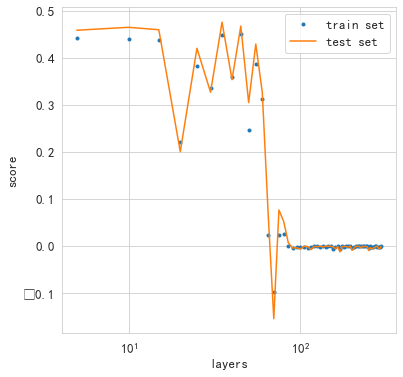

In [219]:
# Plot scores
plt.plot(layers,train_score,'.',label = 'train set')
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")

In [220]:
layers[test_score.index(max(test_score))]

35

# ML in new dataset

In [221]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [222]:
y = datas.iloc[:, 3] 
X = datas.drop(['Scaled sound pressure level'], axis=1)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 
from sklearn.preprocessing import MinMaxScaler
# Training dataset MinMaxSscaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
y_train=y_train.values.reshape(-1,1)
min_max_scaler.fit(y_train)
y_train = min_max_scaler.transform(y_train)
# Testing dataset MinMaxSscaler
min_max_scaler.fit(x_test)
x_test = min_max_scaler.transform(x_test)
y_test=y_test.values.reshape(-1,1)
min_max_scaler.fit(y_test)
y_test = min_max_scaler.transform(y_test)

In [223]:
#Decision Tree
DTR = DecisionTreeRegressor(max_depth=30)
DTR.fit(X_train,y_train)
y_pre_DTR = DTR.predict(x_test)
DTR_score=r2_score(y_test,y_pre_DTR)
print(DTR_score)

0.807446936265206


In [224]:
#SVR
SUPPOT = SVR()
SUPPOT.fit(X_train,y_train)
y_pre_SVR = SUPPOT.predict(x_test)
SVR_score=r2_score(y_test,y_pre_SVR)
print(SVR_score)

0.6727900727062394


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
#Randomforest
rf = RandomForestRegressor(n_estimators=30,max_depth=20)
rf.fit(X_train,y_train)
y_pre_rf = rf.predict(x_test)
rf_score=r2_score(y_test,y_pre_rf)
print(rf_score)

0.9027302339091599


C:\Users\jingu\AppData\Local\Temp/ipykernel_27452/2746876608.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [226]:
#AdaBoostRegression
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pre_adb = adb.predict(x_test)
adb_score=r2_score(y_test,y_pre_adb)
print(adb_score)

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.630356809823774


In [227]:
#GradientBoostingRegression
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,y_train)
y_pre_gbtr = gbtr.predict(x_test)
gbtr_score=r2_score(y_test,y_pre_gbtr)
print(gbtr_score)

0.8275098256538038


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# DL in new dataset

In [228]:
train_score = []
test_score = []
layers = list(range(5,300,5)) 
for i in layers:
    MLP = MLPRegressor(activation = 'logistic', 
                       solver = 'sgd', 
                       hidden_layer_sizes = (i,), 
                       alpha=1e-2, 
                       max_iter = 400,
                       learning_rate_init = 0.1)
    MLP.fit(X_train,y_train)
    train_score.append(MLP.score(X_train,y_train))
    test_score.append(MLP.score(x_test,y_test))

C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jingu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y 

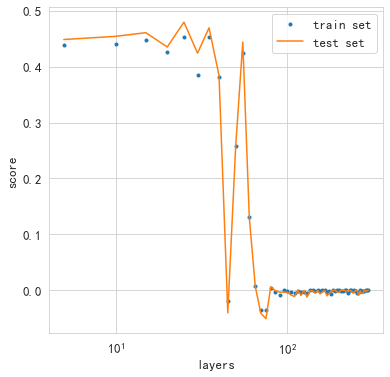

In [229]:
# Plot scores
plt.plot(layers,train_score,'.',label = 'train set')
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")